# COVID-19 RESPONSIVE DASHBOARD











# "Ultimately, the greatest lesson that COVID-19 can teach humanity is that we are all in this together."-Kiran Mazumdar-Shaw.


Coronaviruses are a large family of viruses that cause illness ranging from the common cold to more severe diseases. A novel coronavirus is a new strain that has not been previously identified in humans. The new virus was subsequently named the “COVID-19 virus”.The coronavirus COVID-19 pandemic is the defining global health crisis of our time and the greatest challenge we have faced till now. Since its emergence in Asia in 2019, the virus has spread to every continent except Antarctica.


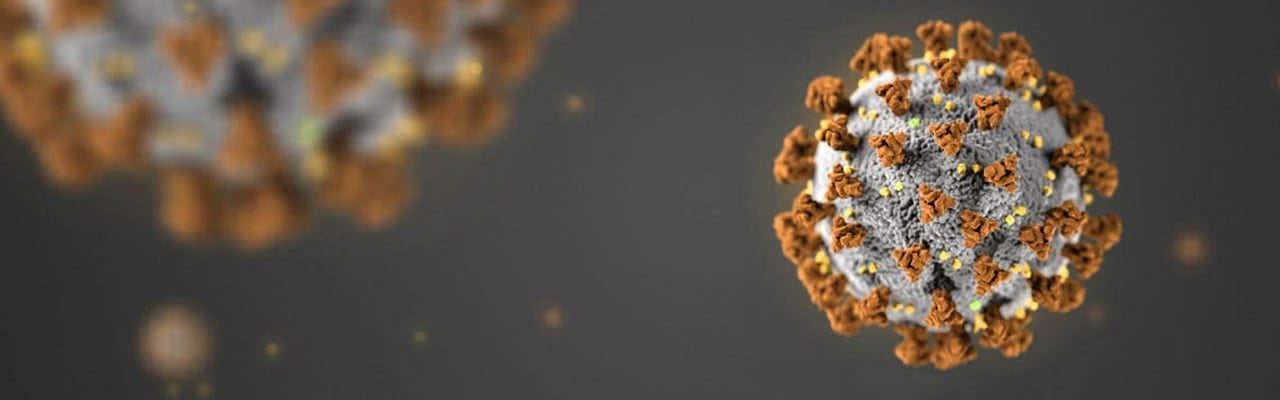

In [1]:
# libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [2]:
# Data loading from github repository of jhon hopkins
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
# Data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [4]:
# changing province/state to state and country/region to country
country_df = country_df.rename(columns={'country_region': 'country'})
country_df = country_df[['country','last_update','lat','long_','confirmed','deaths','recovered','active']]
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})

# delete state as it contains nan value and it will cause problem while plotting map

# confirmed_df.drop('state', axis=1 ,inplace=True)
confirmed_df.lat = confirmed_df.lat.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
confirmed_df.long = confirmed_df.long.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
confirmed_df.lat=confirmed_df.lat.fillna(0)
confirmed_df.long=confirmed_df.long.fillna(0)

In [5]:
# Total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

# Total number of currently affected, dead and recovered patient worldwide.

In [28]:
# Displayt of Total cases:

display(HTML("<div style = 'background-color:#B6D0E2; padding: 30px '>" +
             "<span style='color: blue; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: green; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

# Enter the number of countries you want data for (sorted)

In [7]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color:  crimson'
    y = 'background-color: cadetblue'
    g = 'background-color: olivedrab'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(Number):
    Number= int(Number)
    return country_df.sort_values('confirmed', ascending= False).head(Number).style.apply(highlight_col, axis=None)

interact(show_latest_cases, Number='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='Number'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# 10 Worst hit countries data:

# Confirm cases

In [12]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False).head(5)


In [16]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["Blue"], 
    height=500,
    width=600
)


# Death cases

In [17]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=600
)

# Recovered cases

In [18]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=600
)

In [19]:
import plotly.express as px


In [20]:
  fig = px.scatter(sorted_country_df.head(5), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)

In [21]:
 fig = px.scatter(sorted_country_df.head(5), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
#  update done according to us
 fig.update_layout(
    title=str(5) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 1000
    )
   
fig.show()

# Confirmed v/s death case graph

Enter the country name of which you want information.(keep the first letter capital eg-India)

In [22]:
import plotly.graph_objects as go

In [23]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,5:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
            name=labels[i],
            line=dict(color=colors[i], width=line_size[i]),
            connectgaps=True,
            text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
             ))  
        
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    )
        
        
    fig.show()
# plot_cases_of_a_country('US')
interact(plot_cases_of_a_country, country='World')
     
        

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_cases_of_a_country(country)>

In [24]:
import folium

In [25]:
world_map = folium.Map(location=[20,0], tiles="Stamen Terrain", zoom_start=2)
confirmed_df.dropna(subset=['lat'],inplace=True)
confirmed_df.dropna(subset=['long'],inplace=True)

for i in range(0,len(confirmed_df)):
    folium.Marker( 
    location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
#     fill=True,
#     radius= (int((np.log(confirmed_df.iloc[i,-1]+1.00001))) + 0.2)*50000,
#     fill_color='white' ,
#     color='red',
    tooltip= "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
    ).add_to(world_map)
world_map

In [1]:

pwd


'C:\\Users\\HP\\Untitled Folder 2'